# Eploratory Data Analysis - EDA

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data quality

In [4]:
# import marketing ddataframe
df = pd.read_csv('WA_Marketing-Campaign.csv')

# check head
df.head(3)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03


In [5]:
# check data quality
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [6]:
# check for duplicates
df[df.duplicated()]

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands


Basic data quality check shows that my dataset has 548 observation, with NO NULL values or duplicates. I have 7 features/columns, on which my goal is to analyze the impact of marketing campaigns in SalesInThousands. Data type is in order with what is expected from the features, if this was a ML project, I would have to enconde the `MarketSize` feature into a dummy.

## Market Size

In [34]:
# quick view of market size and sales
mktSZ_sales = df.groupby('MarketSize').agg(TotalSalesUSD=('SalesInThousands', 'sum'),
                                           AvgSalesUSD=('SalesInThousands', 'mean'),
                                           NumSales=('SalesInThousands', 'count')).sort_values(by ='TotalSalesUSD',ascending = False).reset_index()
mktSZ_sales

,MarketSize,TotalSalesUSD,AvgSalesUSD,NumSales
0,Medium,14075.31,43.985344,320
1,Large,11779.61,70.116726,168
2,Small,3444.56,57.409333,60


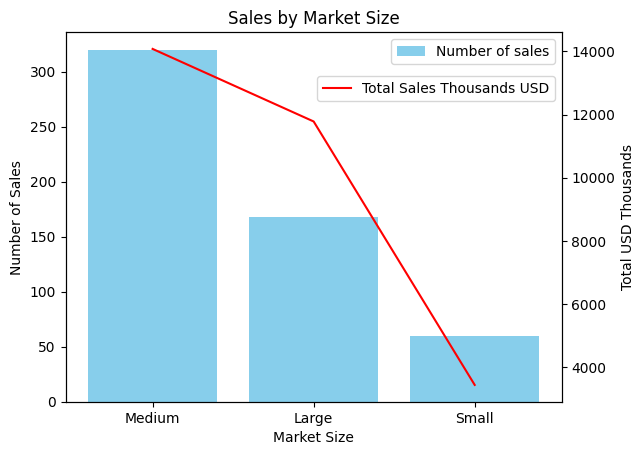

In [ ]:
# plot market size

# create axis
fig, ax1 = plt.subplots()

# bar plot: number of sales
ax1.bar(mktSZ_sales['MarketSize'], mktSZ_sales['NumSales'], color='skyblue', label='Number of sales')
ax1.set_ylabel('Number of Sales')
ax1.set_xlabel('Market Size')

# secondary axis: total USD
ax2 = ax1.twinx()   # use the same x axis
ax2.plot(mktSZ_sales['MarketSize'], mktSZ_sales['TotalSalesUSD'], color='red', label='Total Sales Thousands USD')
ax2.set_ylabel('Total USD Thousands')

# final configs
plt.title('Sales by Market Size')
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

plt.show()

Based on the graphic and numbers, the fast food restaurant had more sales (in number and USD) in areas where in medium areas. An interesting behavior is that in places where we usually have large sales (in quantity), we had fewer transactions but they were more profitable. Which means that in large areas we have a higher revenue per transaction. On the other hand, small stores seem to be have a lower revenue compared to the number of sales. This could mean they are losing revenue per transaction by selling only cheap items.

## Location ID

In [9]:
# check how many stores
df['LocationID'].nunique()

137

In [10]:
# how many stores do we have by size
df.groupby('MarketSize')['LocationID'].nunique()

MarketSize
Large     42
Medium    80
Small     15
Name: LocationID, dtype: int64

This fast food restaurant has 137 stores/units grouped in 3 different sizes, on which we have more stores (80) with a medium size. This make sense considering we also have more sales happening in those type of units.

If I had to latitude and longitude, I could print it on a map with revenue.

In [18]:
# revenue per location
df.groupby(['LocationID', 'MarketSize'])['SalesInThousands'].sum().sort_values(ascending=False)

LocationID  MarketSize
209         Large         380.36
218         Large         364.50
220         Large         361.37
210         Large         357.05
208         Large         354.31
                           ...  
2           Medium        118.18
510         Medium        117.95
5           Medium        116.01
507         Medium        112.57
8           Medium        111.36
Name: SalesInThousands, Length: 137, dtype: float64

Here we can see our top stores in revenue are 'large' stores. With almost triple the revenue medium stores.

## Age of Stores

In [13]:
# avarage age of stores
round(df.groupby('MarketSize')['AgeOfStore'].mean(),0)

MarketSize
Large      7.0
Medium     9.0
Small     11.0
Name: AgeOfStore, dtype: float64

In [35]:
# how many stores and their revenue per age and size
df.groupby(['AgeOfStore','MarketSize']).agg(NumStores=('LocationID', 'count'), 
                                            AvgSalesUSD=('SalesInThousands', 'mean'),
                                            TotalSalesUSD=('SalesInThousands', 'sum')).sort_values(by='TotalSalesUSD', ascending=False)

NumStores  AvgSalesUSD  TotalSalesUSD
AgeOfStore MarketSize                                       
1          Large              32    74.313438        2378.03
           Medium             44    47.413182        2086.18
4          Medium             32    42.958125        1374.66
5          Medium             32    38.210938        1222.75
7          Large              20    61.108500        1222.17
3          Large              16    69.898750        1118.38
6          Medium             24    45.013333        1080.32
4          Large              12    81.383333         976.60
8          Medium             24    40.312500         967.50
9          Medium             20    47.497000         949.94
2          Large              12    69.850000         838.20
12         Medium             20    40.311500         806.23
6          Large              12    64.073333         768.88
19         Large               8    88.165000         705.32
8          Small              12    58.489167         701.87
5          Large               8    86.140000         689.12
11         Medium             12    48.165000         577.98
3          Medium             12    47.845833         574.15
10         Medium             16    34.179375         546.87
13         Large               8    65.997500         527.98
22         Small               8    64.970000         519.76
7          Medium             12    38.497500         461.97
13         Medium              8    52.737500         421.90
18         Medium              8    50.710000         405.68
14         Large               8    50.190000         401.52
7          Small               8    50.126250         401.01
10         Large               8    49.582500         396.66
24         Medium              8    46.466250         371.73
8          Large               4    87.415000         349.66
15         Medium              8    42.673750         341.39
11         Large               4    84.142500         336.57
12         Large               4    83.340000         333.36
19         Medium              8    39.421250         315.37
23         Large               4    77.200000         308.80
19         Small               4    63.017500         252.07
13         Small               4    60.742500         242.97
24         Large               4    60.490000         241.96
20         Medium              4    60.202500         240.81
5          Small               4    59.037500         236.15
9          Small               4    58.887500         235.55
3          Small               4    58.687500         234.75
23         Medium              4    52.995000         211.98
27         Medium              4    52.392500         209.57
28         Small               4    52.285000         209.14
1          Small               4    52.260000         209.04
2          Small               4    50.562500         202.25
17         Medium              4    49.937500         199.75
22         Medium              4    49.125000         196.50
14         Medium              4    46.810000         187.24
9          Large               4    46.600000         186.40
25         Medium              4    45.425000         181.70
2          Medium              4    35.785000         143.14

Newer and medium/large stores have a higher revenue than small and older ones. The first store (probably the one with 28 years old) has one of the lowest revenues and is also small. Only 4 large stores underperform ($46.600) the avarage revenue ($70.1167) for this type of store. The same goes to 4 medium stores with 2 years old, despite being quite new, they are underperforming ($35.785) compared to the network avarage ($43.985). But that could be a matter of location or other competitor rather than the business model itself.

Action point:
- analyze where are these 4 large stores and their surroundings
- competitors nearby?
- where is it located? Specific city?
- demographics
- avarage compensation for that location
- health habits and locals routine

## Promotions

In [146]:
# check avarage revenuw per promotion
avgPromo_sales = df.groupby('Promotion').agg(NumSales=('SalesInThousands', 'count'),
                                            AvgSalesUSD=('SalesInThousands','mean'),
                                            TotalSalesUSD=('SalesInThousands','sum')).reset_index()
avgPromo_sales

,Promotion,NumSales,AvgSalesUSD,TotalSalesUSD
0,1,172,58.099012,9993.03
1,2,188,47.329415,8897.93
2,3,188,55.364468,10408.52


In [48]:
# check promotion
promo_df = df.groupby(['MarketSize','Promotion']).agg(NumSales=('SalesInThousands', 'count'),
                                                        AvgSalesUSD=('SalesInThousands','mean'),
                                                        TotalSalesUSD=('SalesInThousands','sum')).reset_index()

promo_df

,MarketSize,Promotion,NumSales,AvgSalesUSD,TotalSalesUSD
0,Large,1,56,75.235893,4213.21
1,Large,2,64,60.322031,3860.61
2,Large,3,48,77.203958,3705.79
3,Medium,1,96,47.672604,4576.57
4,Medium,2,108,39.114352,4224.35
5,Medium,3,116,45.468879,5274.39
6,Small,1,20,60.162500,1203.25
7,Small,2,16,50.810625,812.97
8,Small,3,24,59.514167,1428.34


C:\Users\anaak\AppData\Local\Temp\ipykernel_21616\3197552334.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=promo_df, x='Promotion', y='TotalSalesUSD', palette='tab10',ci=None , ax=ax3)
C:\Users\anaak\AppData\Local\Temp\ipykernel_21616\3197552334.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_df, x='Promotion', y='TotalSalesUSD', palette='tab10',ci=None , ax=ax3)


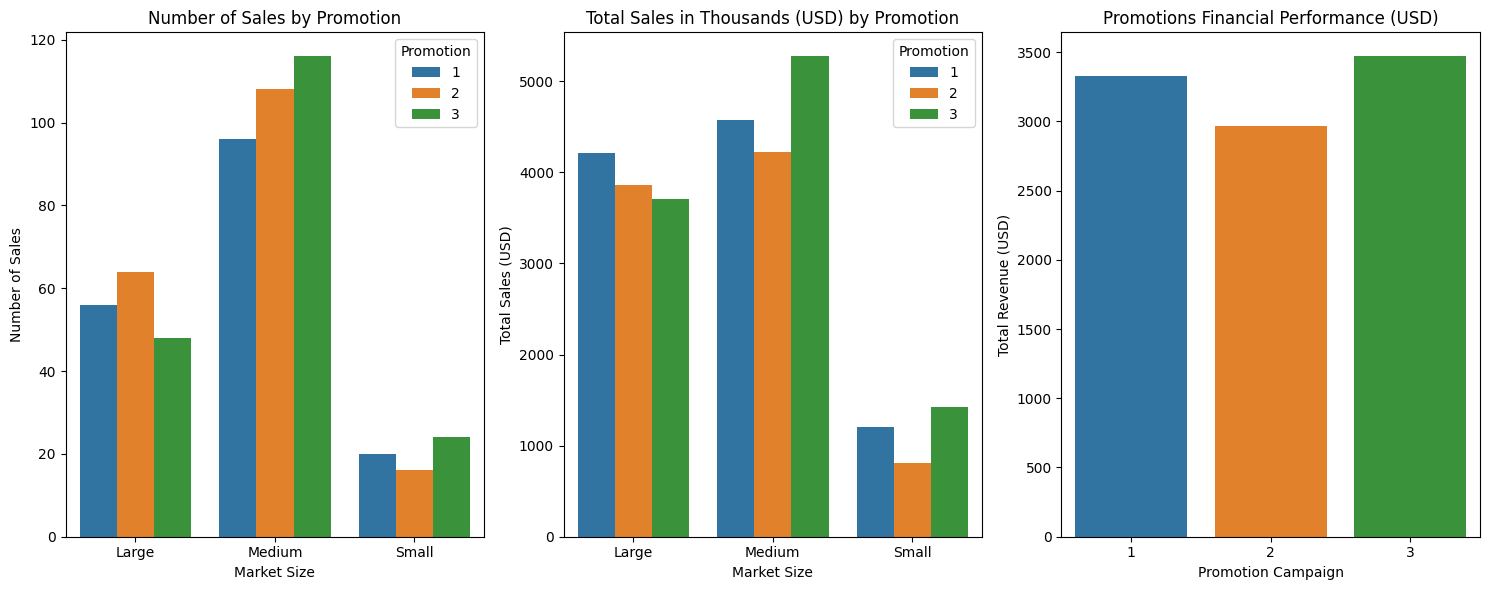

In [97]:
# create figure with two plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

# plot1: number of sales by promotion and market size
sns.barplot(data=promo_df, x='MarketSize', y='NumSales', hue='Promotion', palette='tab10', ax=ax1)
ax1.set_title('Number of Sales by Promotion')
ax1.set_ylabel('Number of Sales')
ax1.set_xlabel('Market Size')
ax1.legend(title='Promotion')

# plot2: total sales USD in thousands by promotion and marketsize
sns.barplot(data=promo_df, x='MarketSize', y='TotalSalesUSD', hue='Promotion', palette='tab10', ax=ax2)
ax2.set_title('Total Sales in Thousands (USD) by Promotion')
ax2.set_ylabel('Total Sales (USD)')
ax2.set_xlabel('Market Size')
ax2.legend(title='Promotion')

# plot3: promotions performance
sns.barplot(data=promo_df, x='Promotion', y='TotalSalesUSD', palette='tab10',ci=None , ax=ax3)
ax3.set_title('Promotions Financial Performance (USD)')
ax3.set_ylabel('Total Revenue (USD)')
ax3.set_xlabel('Promotion Campaign')

# adjust layout to fit on display
plt.tight_layout()
plt.show()

Analyzing the revenue by promotion, we see a similar trend identified in market size analysis. Large stores have a higher revenue even though they are not our top sales units. When we focus on promotions alone, campaign 1 and 3 had a better financial performance than promotion 2, despise promotion 2 had better sales (188 sales) than promotion 1 (178 sales).

## Week

In [150]:
# check sales per week
df.groupby(['Promotion', 'week']).agg(NumSales=('SalesInThousands', 'count'),
                                                AvgSalesUSD=('SalesInThousands','mean'),
                                                TotalSalesUSD=('SalesInThousands','sum'))

NumSales  AvgSalesUSD  TotalSalesUSD
Promotion week                                      
1         1           43    58.244419        2504.51
          2           43    56.929535        2447.97
          3           43    58.774884        2527.32
          4           43    58.447209        2513.23
2         1           47    47.730213        2243.32
          2           47    47.582553        2236.38
          3           47    47.722128        2242.94
          4           47    46.282766        2175.29
3         1           47    55.776170        2621.48
          2           47    55.949149        2629.61
          3           47    54.377872        2555.76
          4           47    55.354681        2601.67

Checking the weeks, promotion 1 had the weakest sales during all 4 weeks of the month (43 sales). However, despite the low number of sales, the avarage revenue is higer than promotion 2 and 3 for the same period. When we observe promotion 2, the high volume of sales does not reflect a good financial performance, scoring the lowest avarage revenue between all 3 promotions (avg 47 thousand USD). Promotion 3 has a good volume of sales (47) consistently during the 4 weeks, and scores the second highest revenue avarage.

## Summary

Based on this exploratory analysis, my understanding of the situation is:

This fast food company has 137 stores, devided between Small (15), Medium (80) and Large (42) stores. The company has been in the market for 28 years, and just opened some big stores (76 new units) that are the top sellers in the network ($4,464 thousand). Marketing team ran a promotion/campaign across the stores, and measures week over week.

Promotion 1 has the lowest volume of sales, but delivered the best financial performance. It means customers bought morte items per transaction, this result happened mainly in medium and large units.

Promotion 2 has a good volume of sales, same as Promotion 3, but had the lowest avarage revenue. This could be interpretated as customers buying cheap items from the menu. To investigate what happen **I suggest the marketing team run an analysis of customer behavior, demographics and location**.

Promotion 3 performed well in sales volume and financial performance.

Also, when analyzed stores size, large and medium unites tend to perform better in terms of sale and revenue. It would be interesting if we had the cost of each unit to see if it's worth to keep **small stores** or not.